<h1 style="text-align: center;">Prenvendo/Detectando cancer de mama através do algoritmo KNN  </h1>

## Pre-configurações e Data Set

In [1]:
# Pacotes
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Semente para aleatoriedade
seed = 123

In [3]:
# Ajustar num linhas/colunas Pandas
pd.options.display.max_columns = None

In [4]:
# Ocutar mensagens de Warning
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Exibir todas as saídas de dados de cada céula do Jupyter
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [6]:
# verssões de pacotes
pd.__version__

'1.5.2'

In [7]:
dados = pd.read_csv('data.csv')
dados.head() # primeiras 5 linhas

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### Explicação dos atributos

Os atributos são divididos em três grupos: Mean, SE e Worst.

> Mean: média de todas as células;

> SE: *Standard Error* (erro padrão de todas as células);

> Worst: média dos três piores valores medidos das células. Na verdade, é considerado "pior" porque são medidas indicativas de células não saudáveis; na realidade o "pior" significa os maiores valores medidos para raio, perímetro, textura etc.

Cada grupo tem 10 atributos: 
- radius (raio da célula)
- texture (textura da célula - medida pelo desvio padrão de escalas de cinza, que ajudam a indicar se a célula é saudável ou não)
-	perimeter (perímetro)
-	area (área)
-	smoothness (variação local em comprimentos de raio)
- compactness (campactude = perimetro²/area - 1)
- concavity (gravidade das porções côncavas das células)
- concave points (número de porções côncavas no contorno da célula),
- symmetry (simetria) 
- fractal_dimension (dimensão fractal). 

## Pre-processamento

In [8]:
# Deletando a Coluna Id
dados.drop(labels = ['id', 'Unnamed: 32'], axis = 1, inplace = True)

In [9]:
dados.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [10]:
# ajustando o label da variável target, para ficar mais apresentável.
dados.diagnosis.replace({'M': 'Maligno', 'B' : 'Benigno'})

0      Maligno
1      Maligno
2      Maligno
3      Maligno
4      Maligno
        ...   
564    Maligno
565    Maligno
566    Maligno
567    Maligno
568    Benigno
Name: diagnosis, Length: 569, dtype: object

Note que temos quase 2/3 (62,7 %) dos registros são da classe “Benigno”, logo esse dataset está com desbalanceamento entre as classes. Devemos manter isso em mente para quando formos separar os dados em treino e teste.

In [11]:
# verificando proporção
dados.diagnosis.value_counts() / dados.shape[0] * 100

B    62.741652
M    37.258348
Name: diagnosis, dtype: float64

Os dados estão em escalas diferentes. Há dados em escala de milhar, como a variável “area_mean”, e dados em escala de centésimos, como a variável “ symmetry_mean”.
Dessa forma, vamos normalizar colocando todos os valores de todas as features numa escala entre 0 e 1. Note que só aplicamos a normalização aos dados numéricos, que nesse caso são as features, que estão na variável X abaixo.

In [12]:
# separando em X as variáveis preditoas e em y a variável target
X = dados.iloc[:, 1:]
y = dados.iloc[:, 0]

# Aplicando a normalização aos dados de X, e colocando no DataFrame X_norm
X_norm = pd.DataFrame(MinMaxScaler(feature_range = (0, 1)).fit_transform(X))

# Imprimindo as 5 primeiras linhas dos dados normalizados
X_norm.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,0.356147,0.120469,0.369034,0.273811,0.159296,0.351398,0.135682,0.300625,0.311645,0.183042,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,0.156437,0.082589,0.124440,0.125660,0.119387,0.081323,0.046970,0.253836,0.084539,0.091110,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,0.229622,0.094303,0.180370,0.162922,0.150831,0.283955,0.096768,0.389847,0.205690,0.127006,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,0.139091,0.175875,0.126655,0.038155,0.251453,0.543215,0.142955,0.353665,0.728148,0.287205,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,0.233822,0.093065,0.220563,0.163688,0.332359,0.167918,0.143636,0.357075,0.136179,0.145800,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


## Construindo o algoritmo

Separando 70% dos dados para treino e 30% para teste

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size = 0.3, random_state = seed) 

* Treinado o modelo

In [14]:
# Criando o modelo (k = 5)
modelo_knn_v1 = KNeighborsClassifier(n_neighbors = 5, n_jobs = 2)

# Fitting/Treino do modelo
modelo_knn_v1.fit(X_train, y_train)

KNeighborsClassifier(n_jobs=2)

* Avaliação 

In [15]:
# Realizando as previsões
previsao = modelo_knn_v1.predict(X_test)

# Medido a acurácia
print('Acurácia: {:.3f}'.format(accuracy_score(y_test, previsao)))

# Medido pelo Classification Report
print('\nClassification Report:\n', classification_report(y_test, previsao))

Acurácia: 0.977

Classification Report:
               precision    recall  f1-score   support

           B       0.98      0.98      0.98       103
           M       0.97      0.97      0.97        68

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



A avaliação da performance do modelo treinado nos dados de teste. Pelo indicativo de recall do classification report, o modelo errou 2% (2/103) das ocorrências de Benigno e 3% (2/68) das ocorrências de Maligno. A acurácia geral do modelo ficou em 98%.

<Figure size 640x480 with 0 Axes>

<AxesSubplot: >

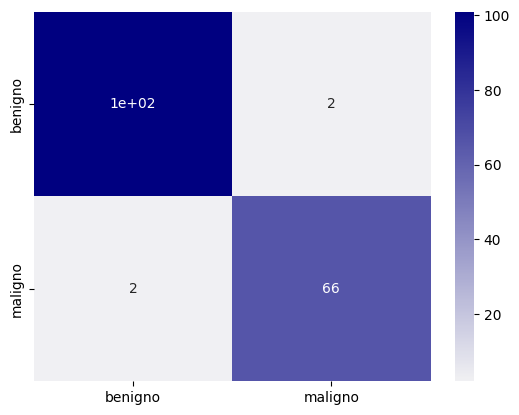

In [16]:
conf_mat = confusion_matrix(y_test, previsao)

df_cm = pd.DataFrame(conf_mat, index = [i for i in ['benigno', 'maligno']],
                  columns = [i for i in ['benigno', 'maligno']])

cmap = sns.light_palette("navy", as_cmap=True)
plt.figure()
sns.heatmap(df_cm, annot=True, cmap=cmap)

## Demonstração

* Primeira previsão (visão completa)

In [17]:
print("Dados ", X_test.values[0])
print("Previsão: ", previsao[0])
print("Diagnóstico: ", y_test.values[0])

Dados  [0.20204458 0.17145756 0.19065718 0.10455992 0.27471337 0.07729587
 0.0022814  0.0146173  0.36010101 0.22851727 0.03726236 0.1405366
 0.03637563 0.01544272 0.13271238 0.03659086 0.00245884 0.05571131
 0.12829966 0.03921894 0.17182497 0.26759062 0.15772698 0.07557511
 0.3000066  0.06854498 0.00440735 0.05728522 0.24640252 0.12554113]
Previsão:  B
Diagnóstico:  B


* 10 primeires previsões

In [18]:
print("Previsão:    ", previsao[0:9])
print("Diagnóstico: ", y_test.values[0:9])

Previsão:     ['B' 'B' 'M' 'B' 'M' 'B' 'B' 'B' 'B']
Diagnóstico:  ['B' 'B' 'M' 'B' 'M' 'B' 'B' 'M' 'B']


## Referências 


- O dataset usado é de dominio público, disponibilizado pela UCI (Universidade da Califórnia em Irvine) no [Kaggle](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data). 
- LAMPIER, R. Prevendo Câncer de Mama com Algoritmo KNN. Disponível em: <https://rodrigolampier.medium.com/prevendo-c%C3%A2ncer-de-mama-com-algoritmo-knn-b1af6749c985>. Acesso em: 11 dez. 2022.
- OLIVERA, A. Predição de Câncer de Mama com KNN. Disponível em: <https://www.kaggle.com/code/alineregioli/predi-o-de-c-ncer-de-mama-com-knn/notebook>. Acesso em: 11 dez. 2022. 